In [407]:
import pandas as pd
import numpy as np

In [409]:
df = pd.read_csv('train-balanced-sarcasm.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010827 entries, 0 to 1010826
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   label           1010827 non-null  object 
 1   comment         1010771 non-null  object 
 2   author          1010826 non-null  object 
 3   subreddit       1010826 non-null  object 
 4   score           1010826 non-null  float64
 5   ups             1010826 non-null  float64
 6   downs           1010826 non-null  float64
 7   date            1010826 non-null  object 
 8   created_utc     1010826 non-null  object 
 9   parent_comment  1010826 non-null  object 
dtypes: float64(3), object(7)
memory usage: 77.1+ MB


In [410]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2.0,-1.0,-1.0,Oct-16,2016/10/16 23:55,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,-1.0,-1.0,Nov-16,2016/11/01 00:24,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,3.0,0.0,Sep-16,2016/09/22 21:45,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,-1.0,-1.0,Oct-16,2016/10/18 21:03,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,-1.0,-1.0,Dec-16,2016/12/30 17:00,Yep can confirm I saw the tool they use for th...


In [411]:
#drop the missing comments
df.dropna(subset=['comment'], inplace=True)

In [412]:
df['label'].value_counts()

label
0    505403
1    505368
Name: count, dtype: int64

In [413]:
import re
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Lower the text, even if sarcasm can be do using maj. We lower all the letter to have a better model performance
    text = text.lower()

    # remove the user refeerences because it doesn't have an impact in the detection and it can add confusions
    text = re.sub(r"@\w+", "", text)

    # replace all the urls by a '<URL>' to have the same token for all the urls
    text = re.sub(r"http\S+|www\S+|https\S+", "<URL>", text, flags=re.MULTILINE)

    # Same for the digits
    text = re.sub(r"\d+", "<NUM>", text)

    # remove the space
    text = text.strip()

    # tokenise the text
    tokens = nltk.word_tokenize(text)

    # Use lemmatizer to reduce words to their base forms
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin the tokens
    cleaned_text = " ".join(tokens)

    return cleaned_text

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/enorabarbier/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/enorabarbier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/enorabarbier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [414]:
df['comment'] = df['comment'].fillna("").astype(str)

In [415]:
df['clean_com'] = df['comment'].apply(preprocess_text)
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,clean_com
0,0,NC and NH.,Trumpbart,politics,2.0,-1.0,-1.0,Oct-16,2016/10/16 23:55,"Yeah, I get that argument. At this point, I'd ...",nc and nh .
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,-1.0,-1.0,Nov-16,2016/11/01 00:24,The blazers and Mavericks (The wests 5 and 6 s...,you do know west team play against west team m...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,3.0,0.0,Sep-16,2016/09/22 21:45,They're favored to win.,"they were underdog earlier today , but since g..."
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,-1.0,-1.0,Oct-16,2016/10/18 21:03,deadass don't kill my buzz,this meme is n't funny none of the `` new york...
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,-1.0,-1.0,Dec-16,2016/12/30 17:00,Yep can confirm I saw the tool they use for th...,i could use one of those tool .


In [416]:
# Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_com'].apply(lambda x: sia.polarity_scores(x)['compound'])

print(df[['clean_com', 'sentiment']].head())

                                           clean_com  sentiment
0                                        nc and nh .     0.4939
1  you do know west team play against west team m...     0.3400
2  they were underdog earlier today , but since g...     0.4767
3  this meme is n't funny none of the `` new york...    -0.3412
4                    i could use one of those tool .     0.0000


In [417]:

def negative_positive_pattern(text):
    # Tokenize the text into words
    words = re.findall(r'\w+', text)
    
    # Analyze the sentiment of each word and get the compound score
    word_sentiments = [sia.polarity_scores(word)['compound'] for word in words]
    
    # Iterate through the sentiment scores to detect patterns
    for i in range(len(word_sentiments) - 1):
        # Detect if a negative word is followed by a positive word
        if word_sentiments[i] < 0 and word_sentiments[i + 1] > 0:
            return 1  # Pattern detected: Negative -> Positive
        
        # Detect if a positive word is followed by a negative word
        if word_sentiments[i] > 0 and word_sentiments[i + 1] < 0:
            return 1  # Pattern detected: Positive -> Negative
        
        # Detect if a neutral word exists between a positive and negative word
        if (word_sentiments[i] > 0 and word_sentiments[i + 1] == 0 and i + 2 < len(word_sentiments) and word_sentiments[i + 2] < 0):
            return 1  # Pattern detected: Positive -> Neutral -> Negative
        
        # Also check for the reverse: Neutral between Negative and Positive
        if (word_sentiments[i] < 0 and word_sentiments[i + 1] == 0 and i + 2 < len(word_sentiments) and word_sentiments[i + 2] > 0):
            return 1  # Pattern detected: Negative -> Neutral -> Positive
    
    return 0  # No relevant pattern detected

df['neg_pos_pattern'] = df['clean_com'].apply(negative_positive_pattern)

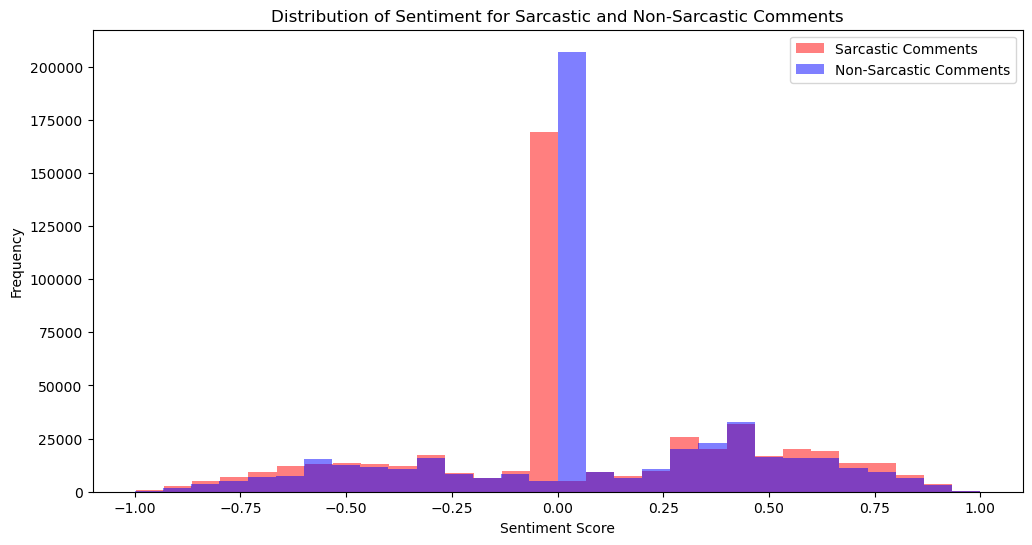

In [445]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['label']= df['label'].astype('int')

sarcastic_data = df[df['label'] == 1]
not_sarcastic_data = df[df['label'] == 0]

# Plotting the histograms
plt.figure(figsize=(12, 6))

# Histogram for sarcastic comments
plt.hist(sarcastic_data['sentiment'], bins=30, alpha=0.5, label='Sarcastic Comments', color='red')

# Histogram for non-sarcastic comments
plt.hist(not_sarcastic_data['sentiment'], bins=30, alpha=0.5, label='Non-Sarcastic Comments', color='blue')

# Adding titles and labels
plt.title('Distribution of Sentiment for Sarcastic and Non-Sarcastic Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010771 entries, 0 to 1010826
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   label              1010771 non-null  object 
 1   comment            1010771 non-null  object 
 2   author             1010771 non-null  object 
 3   subreddit          1010771 non-null  object 
 4   score              1010771 non-null  float64
 5   ups                1010771 non-null  float64
 6   downs              1010771 non-null  float64
 7   date               1010771 non-null  object 
 8   created_utc        1010771 non-null  object 
 9   parent_comment     1010771 non-null  object 
 10  clean_com          1010771 non-null  object 
 11  sentiment          1010771 non-null  float64
 12  neg_pos_pattern    1010771 non-null  int64  
 13  exclamation_count  1010771 non-null  int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 115.7+ MB


In [282]:
# One-Hot encoding for the variables nominales
cat_col = ['label']
df = pd.get_dummies(df, columns=cat_col)
df.head()

,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,clean_com,sentiment,neg_pos_pattern,exclamation_count,label_0,label_1
0,NC and NH.,Trumpbart,politics,2.0,-1.0,-1.0,Oct-16,2016/10/16 23:55,"Yeah, I get that argument. At this point, I'd ...",nc and nh .,0.4939,0,0,True,False
1,You do know west teams play against west teams...,Shbshb906,nba,-4.0,-1.0,-1.0,Nov-16,2016/11/01 00:24,The blazers and Mavericks (The wests 5 and 6 s...,you do know west team play against west team m...,0.3400,0,0,True,False
2,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,3.0,0.0,Sep-16,2016/09/22 21:45,They're favored to win.,"they were underdog earlier today , but since g...",0.4767,0,0,True,False
3,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,-1.0,-1.0,Oct-16,2016/10/18 21:03,deadass don't kill my buzz,this meme is n't funny none of the `` new york...,-0.3412,0,0,True,False
4,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,-1.0,-1.0,Dec-16,2016/12/30 17:00,Yep can confirm I saw the tool they use for th...,i could use one of those tool .,0.0000,0,0,True,False


In [299]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_train, y_val = train_test_split(df['clean_com'], df['label_1'])

In [301]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [303]:
X_train_vec = vectorizer.fit_transform(X_tr)
X_val_vec = vectorizer.transform(X_val)

In [305]:
np.shape(X_train_vec)

(758078, 126257)

## Random Forest

In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

# Setting up K-Fold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Defining the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0)
}

# Setting up the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,           # Number of trees
    max_depth=6,                # Maximum depth of each tree
    min_samples_split=3,        # Minimum samples to split an internal node
    min_samples_leaf=2,         # Minimum samples in a leaf node
    max_features='sqrt',        # Number of features to consider when looking for the best split
    random_state=42             # Ensures reproducibility
)

# Performing cross-validation for each metric
cv_results = {}
for metric_name, scorer in scoring.items():
    scores = cross_val_score(rf_model, X_train_vec, y_train, cv=kfold, scoring=scorer)
    cv_results[metric_name] = scores
    print(f"\n{metric_name.capitalize()} scores for each fold: {scores}")
    print(f"Average {metric_name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Training the model using all training data
rf_model.fit(X_train_vec, y_train)


Accuracy scores for each fold: [0.65644127 0.66033268 0.6576021  0.65262012 0.64998846]
Average accuracy: 0.6554 (+/- 0.0073)

Precision scores for each fold: [0.66265131 0.6628586  0.66506676 0.66173978 0.65716131]
Average precision: 0.6619 (+/- 0.0052)

Recall scores for each fold: [0.65644127 0.66033268 0.6576021  0.65262012 0.64998846]
Average recall: 0.6554 (+/- 0.0073)

F1 scores for each fold: [0.65311391 0.65889012 0.65369472 0.64786749 0.64605654]
Average f1: 0.6519 (+/- 0.0091)


RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=200, random_state=42)

In [322]:
train_pred = rf_model.predict(X_train_vec)
print("\nComparison of scores:")
print("Metric      Training Score    CV Score (mean ± std)")
print("-" * 55)
print(f"Accuracy    {accuracy_score(y_train, train_pred):.4f}           {cv_results['accuracy'].mean():.4f} ± {cv_results['accuracy'].std():.4f}")
print(f"Precision   {precision_score(y_train, train_pred, average='weighted'):.4f}           {cv_results['precision'].mean():.4f} ± {cv_results['precision'].std():.4f}")
print(f"Recall      {recall_score(y_train, train_pred, average='weighted'):.4f}           {cv_results['recall'].mean():.4f} ± {cv_results['recall'].std():.4f}")
print(f"F1 Score    {f1_score(y_train, train_pred, average='weighted'):.4f}           {cv_results['f1'].mean():.4f} ± {cv_results['f1'].std():.4f}")


Comparison of scores:
Metric      Training Score    CV Score (mean ± std)
-------------------------------------------------------
Accuracy    0.6622           0.6554 ± 0.0037
Precision   0.6688           0.6619 ± 0.0026
Recall      0.6622           0.6554 ± 0.0037
F1 Score    0.6589           0.6519 ± 0.0046


In [323]:

# Predicting labels for validation set
y_pred = rf_model.predict(X_val_vec)

# Evaluating on validation set
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print("\nValidation Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Validation Set Metrics:
Accuracy: 0.6580
Precision: 0.6639
Recall: 0.6580
F1 Score: 0.6549
